In [35]:

library (tidyverse)
library (dplyr)
library(testthat)
library(digest)
library(repr)
library(tidymodels)

URL1 <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
heart_data1 <- read_csv (URL1)
#hungerian

URL2 <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"
heart_data2 <- read_csv (URL2)
#switzerland

URL3 <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_data3 <- read_csv (URL3)
#cleveland

URL4 <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data"
heart_data4 <- read_csv (URL4)
#va


colnames (heart_data1) <- c("age", "sex", "cp", "trestbps", "chol", "fbs",  "restecg", "thalach", "exang",  "oldpeak", "slope",  "ca",  "thal", "num")
colnames (heart_data2) <- c("age", "sex", "cp", "trestbps", "chol", "fbs",  "restecg", "thalach", "exang",  "oldpeak", "slope",  "ca",  "thal", "num")
colnames (heart_data3) <- c("age", "sex", "cp", "trestbps", "chol", "fbs",  "restecg", "thalach", "exang",  "oldpeak", "slope",  "ca",  "thal", "num")
colnames (heart_data4) <- c("age", "sex", "cp", "trestbps", "chol", "fbs",  "restecg", "thalach", "exang",  "oldpeak", "slope",  "ca",  "thal", "num")


# we examined the data set, heart_data2, and it is evident that it is missing the key values of chol and fbs, so we decided not to use it.



#heart_data1
heart_data <- rbind (heart_data1, heart_data3, heart_data4)
#heart_data

#changing the ? to NA
heart_data_modified <- heart_data
heart_data_modified [heart_data_modified == "?"] <- NA
#heart_data_modified

#pull out the num column 

num <- heart_data_modified %>%
    select (num) %>%
    mutate (num = as.character (num))

num [num == "1"] <- "Y"
num [num == "2"] <- "Y"
num [num == "3"] <- "Y"
num [num == "4"] <- "Y"
num [num == "0"] <- "N"

num <- num %>%
 mutate (num = as_factor (num))
#num

#selecting the wanted columns
heart_data_selected <- heart_data_modified %>%
    select (age: exang)
#heart_data_selected


heart_data_cleaned0 <- cbind (heart_data_selected, num) %>%
    rename ("heart_disease" = "num")
#heart_data_cleaned0


heart_data_cleaned1 <- heart_data_cleaned0 %>%
     mutate (trestbps = as.numeric (trestbps),
            chol = as.numeric (chol),
            fbs = as.numeric (fbs),
            restecg = as.numeric (restecg),
            thalach = as.numeric (thalach),
            exang = as.numeric (exang))

#heart_data_cleaned1





Warning message:
“Duplicated column names deduplicated: '2' => '2_1' [7], '0' => '0_1' [9], '0' => '0_2' [10], '?' => '?_1' [12], '?' => '?_2' [13], '0' => '0_3' [14]”
Parsed with column specification:
cols(
  `28` = col_double(),
  `1` = col_double(),
  `2` = col_double(),
  `130` = col_character(),
  `132` = col_character(),
  `0` = col_character(),
  `2_1` = col_character(),
  `185` = col_character(),
  `0_1` = col_character(),
  `0_2` = col_double(),
  `?` = col_character(),
  `?_1` = col_character(),
  `?_2` = col_character(),
  `0_3` = col_double()
)

Warning message:
“Duplicated column names deduplicated: '1' => '1_1' [3], '0' => '0_1' [7], '0' => '0_2' [9], '1' => '1_2' [11], '?' => '?_1' [12], '?' => '?_2' [13], '1' => '1_3' [14]”
Parsed with column specification:
cols(
  `32` = col_double(),
  `1` = col_double(),
  `1_1` = col_double(),
  `95` = col_character(),
  `0` = col_double(),
  `?` = col_character(),
  `0_1` = col_character(),
  `127` = col_character(),
  `0_2` = col_

In [19]:
set.seed(1)

heart_split <- initial_split(heart_data_cleaned1, prop = 0.75, strata = heart_disease)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

# heart_train
# heart_test

In [36]:
heart_data2

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
34,1,4,115,0,?,?,154,0,.2,1,?,?,1
35,1,4,?,0,?,0,130,1,?,?,?,7,3
36,1,4,110,0,?,0,125,1,1,2,?,6,1
38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
38,0,4,110,0,0,0,156,0,0,2,?,3,1
38,1,3,100,0,?,0,179,0,-1.1,1,?,?,0
38,1,3,115,0,0,0,128,1,0,2,?,7,1
38,1,4,135,0,?,0,150,0,0,?,?,3,2
38,1,4,150,0,?,0,120,1,?,?,?,3,1


In [4]:
#how many of each observations
heart_disease_proportion <- heart_train %>%
    group_by (heart_disease) %>%
    summarize (observation_number = n()) %>%
    mutate (percent = 100*observation_number/nrow(heart_train))
heart_disease_proportion

`summarise()` ungrouping output (override with `.groups` argument)



heart_disease,observation_number,percent
<fct>,<int>,<dbl>
N,307,44.62209
Y,381,55.37791


In [5]:
#the means of the predictor variables you plan to use in your analysis

predictors_mean <- heart_train %>%
    summarize(across (age: exang, mean, na.rm = TRUE))
predictors_mean    

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
53.61773,0.7936047,3.25,131.4705,196,0.1601942,0.6107872,137.0725,0.3950617


In [29]:
#how many rows have missing data

na_count <- heart_train %>%
    filter (is.na(age) | is.na(sex) | is.na(cp) | is.na(trestbps) | is.na(chol) | is.na(fbs)
            | is.na(restecg) | is.na(thalach) | is.na(exang) | is.na(heart_disease)) 
   

count <- nrow(na_count)
count

heart_train


[1] 137

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,heart_disease
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,29,1,2,120,243,0,0,160,0,N
2,29,1,2,140,NA,0,0,170,0,N
3,30,0,1,170,237,0,1,170,0,N
4,31,0,2,100,219,0,1,150,0,N
5,32,0,2,105,198,0,0,165,0,N
6,32,1,2,110,225,0,0,184,0,N
7,32,1,2,125,254,0,0,155,0,N
8,33,1,3,120,298,0,0,185,0,N
9,34,0,2,130,161,0,0,190,0,N


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 44 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 24 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 70 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 40 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning m

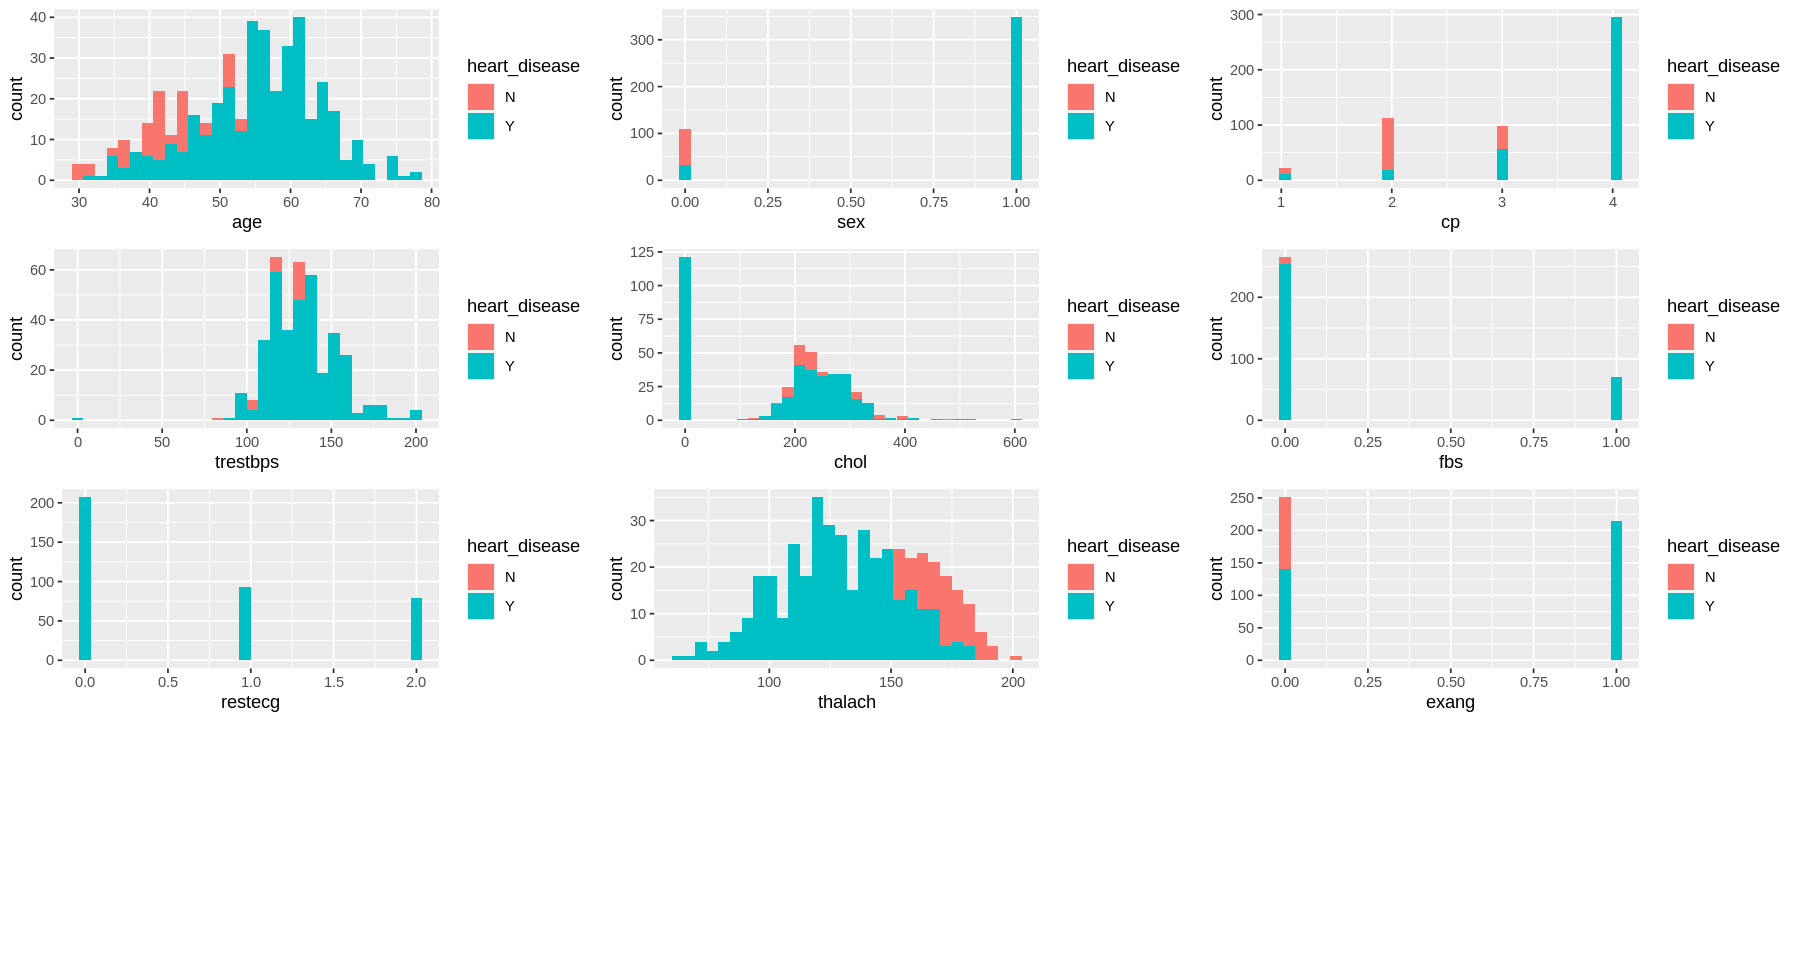

In [33]:
options(repr.plot.height = 8, repr.plot.width=15)
library(gridExtra)
#age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	heart_disease
plot_age <- heart_train %>% 
    ggplot(aes(x = age, fill = heart_disease)) + 
    geom_histogram(position = "identity") 

plot_sex <- heart_train %>% 
    ggplot(aes(x = sex, fill = heart_disease)) + 
    geom_histogram(position = "identity") 

plot_cp <- heart_train %>% 
    ggplot(aes(x = cp, fill = heart_disease)) + 
    geom_histogram(position = "identity")

plot_trestbps<- heart_train %>% 
    ggplot(aes(x = trestbps, fill = heart_disease)) + 
    geom_histogram(position = "identity") 

plot_chol <- heart_train %>% 
    ggplot(aes(x = chol, fill = heart_disease)) + 
    geom_histogram(position = "identity")

plot_fbs <- heart_train %>% 
    ggplot(aes(x = fbs, fill = heart_disease)) + 
    geom_histogram(position = "identity")

plot_restecg <- heart_train %>% 
    ggplot(aes(x = restecg, fill = heart_disease)) + 
    geom_histogram(position = "identity")

plot_thalach <- heart_train %>% 
    ggplot(aes(x = thalach, fill = heart_disease)) + 
    geom_histogram(position = "identity")

plot_exang <- heart_train %>% 
    ggplot(aes(x = exang, fill = heart_disease)) + 
    geom_histogram(position = "identity")

grid.arrange(plot_age, plot_sex, plot_cp, plot_trestbps, plot_chol ,plot_fbs, plot_restecg, plot_thalach, plot_exang, nrow=4)

In [27]:
# heart data 2 is missing values for cholestrol
#heart_data2
heart_data4

# heart dat 2 is missing 

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
44,1,4,130,209,0,1,127,0,0,?,?,?,0
60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
65,1,4,150,236,1,1,105,1,0,?,?,?,3
60,1,3,180,0,0,1,140,1,1.5,2,?,?,0
60,1,3,120,0,?,0,141,1,2,1,?,?,3
60,1,2,160,267,1,1,157,0,0.5,2,?,?,1
